In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [182]:
pokemon = pd.read_csv("PokemonGOData.csv")

In [183]:
pokemon['Pokemon'].duplicated().any()

True

In [184]:
pokemon['Pokemon'].duplicated().sum()

1

In [185]:
pokemon = pokemon.drop_duplicates(subset='Pokemon', keep='first')

In [186]:
print(pokemon.head(5))

     Pokemon Max CP  Max HP  Attack  Defense  Stamina  Total Stats  \
0    Slaking  4,431     233     290      166      284          740   
1  Regigigas  4,346     184     287      210      221          718   
2     Mewtwo  4,178     179     300      182      214          696   
3    Groudon  4,115     171     270      228      205          703   
4     Kyogre  4,115     171     270      228      205          703   

   Is Legendary   Type 1 Type 2  
0         False   normal   none  
1          True   normal   none  
2          True  psychic   none  
3          True   ground   none  
4          True    water   none  


In [187]:
type1 = pd.get_dummies(pokemon['Type 1'])
type2 = pd.get_dummies(pokemon['Type 2'])
typeVectors = type1.add(type2, fill_value=0)
#typeVectors['Is Legendary'] = pokemon['Is Legendary'].astype(int).values
typeVectors.head()

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,none,normal,poison,psychic,rock,steel,water
0,False,False,False,False,False,False,False,False,False,False,False,False,1.0,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,1.0,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,1.0,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,1.0,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,1.0,False,False,False,False,False,True


In [188]:
pokemon['Max CP'] = pokemon['Max CP'].str.replace(',', '')
pokemon['Max CP'] = pd.to_numeric(pokemon['Max CP'])

stats = pokemon[['Max CP','Max HP','Attack','Defense','Stamina']]
scaler = MinMaxScaler()
stats_scaled = scaler.fit_transform(stats)

In [189]:
pokemonVectors = np.hstack([typeVectors.values, stats_scaled])

In [190]:
similarityMatrix = cosine_similarity(pokemonVectors)

In [191]:
similarity_df = pd.DataFrame(similarityMatrix, index=pokemon['Pokemon'], columns=pokemon['Pokemon'])
#print(similarity_df.head())

In [192]:
top10Similar = {}
for name in similarity_df.index:
    row = similarity_df.loc[name]
    row = row.drop(name)
    rowSorted = row.sort_values(ascending=False)
    top10Similar[name] = rowSorted.head(10).to_dict()

for name, similars in top10Similar.items():
    print(f"{name} Most Similar Pokémon:")
    for similarName, score in similars.items():
        print(f"  {similarName} ({score:.3f})")
    print()

Slaking Most Similar Pokémon:
  Regigigas (0.995)
  Arceus (0.992)
  Porygon-Z (0.990)
  Ursaring (0.987)
  Snorlax (0.982)
  Stoutland (0.980)
  Bouffalant (0.980)
  Porygon2 (0.977)
  Kangaskhan (0.976)
  Tauros (0.973)

Regigigas Most Similar Pokémon:
  Arceus (0.996)
  Slaking (0.995)
  Porygon-Z (0.993)
  Ursaring (0.988)
  Stoutland (0.985)
  Bouffalant (0.983)
  Porygon2 (0.982)
  Tauros (0.981)
  Ambipom (0.976)
  Zangoose (0.975)

Mewtwo Most Similar Pokémon:
  Azelf (0.995)
  Espeon (0.993)
  Alakazam (0.991)
  Mew (0.988)
  Mesprit (0.987)
  Beheeyem (0.986)
  Reuniclus (0.985)
  Deoxys (0.983)
  Musharna (0.975)
  Gothitelle (0.971)

Groudon Most Similar Pokémon:
  Donphan (0.991)
  Hippowdon (0.989)
  Drilbur (0.930)
  Hippopotas (0.929)
  Trapinch (0.924)
  Phanpy (0.911)
  Cubone (0.903)
  Dugtrio (0.816)
  Regigigas (0.763)
  Slaking (0.761)

Kyogre Most Similar Pokémon:
  Manaphy (0.993)
  Feraligatr (0.989)
  Milotic (0.989)
  Kingler (0.989)
  Clawitzer (0.988)
  Sam

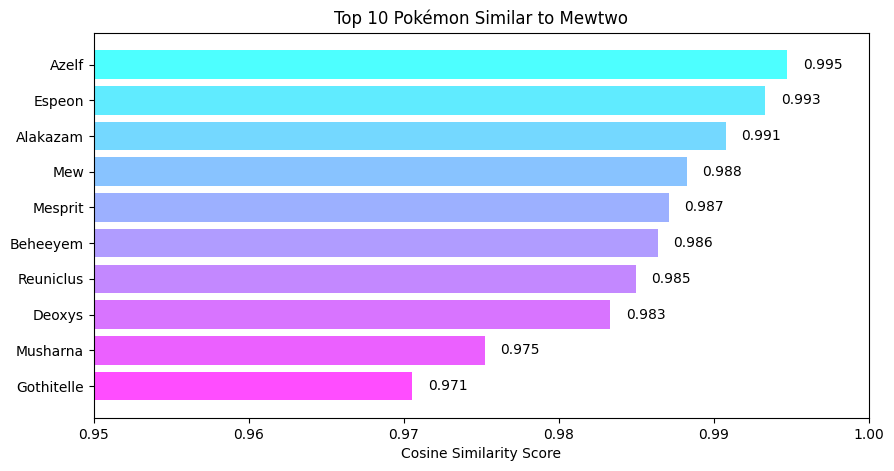

In [195]:
graph1 = top10Similar['Mewtwo']

names = list(graph1.keys())
scores = list(graph1.values())

colors = plt.cm.cool(np.linspace(0, 1, len(names))) * 0.7 + 0.3

plt.figure(figsize=(10,5))
bars = plt.barh(names, scores, color=colors)
plt.gca().invert_yaxis()  # highest score at top
plt.xlabel("Cosine Similarity Score")
plt.title(f"Top 10 Pokémon Similar to Mewtwo")
plt.xlim(0.95, 1.0)

for bar, score in zip(bars, scores):
    plt.text(
        bar.get_width() + 0.001,
        bar.get_y() + bar.get_height()/2,
        f"{score:.3f}",
        va='center', ha='left', fontsize=10
    )
    
plt.show()

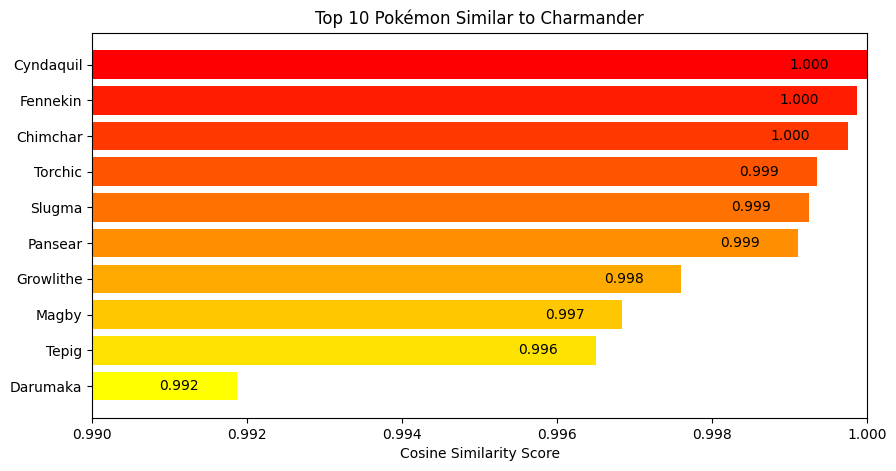

In [198]:
graph2 = top10Similar['Charmander']

names = list(graph2.keys())
scores = list(graph2.values())

colors = plt.cm.autumn(np.linspace(0, 1, len(names)))

plt.figure(figsize=(10,5))
bars = plt.barh(names, scores, color=colors)
plt.gca().invert_yaxis()  # highest score at top
plt.xlabel("Cosine Similarity Score")
plt.title(f"Top 10 Pokémon Similar to Charmander")
plt.xlim(0.99, 1.0)

for bar, score in zip(bars, scores):
    plt.text(
        bar.get_width() - 0.001,
        bar.get_y() + bar.get_height()/2,
        f"{score:.3f}",
        va='center', ha='left', fontsize=10
    )
    
plt.show()